# connections

In [ ]:
import os
key_file = '/content/drive/Shareddrives/GWAR/calm-hologram-415506-d0dc405d74ab.json'  # Replace with your uploaded key filename
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = key_file


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install zstandard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 7.8 MB/s eta 0:00:00


# Validation Data

In [ ]:
import pandas as pd

# Define the path to the file
validation_data_path = '/content/drive/Shareddrives/GWAR/stock_tweets.csv'
validation_data_path

'/content/drive/Shareddrives/GWAR/stock_tweets.csv'

In [ ]:
#Randomly taking 10% of the Validation Data
df = pd.read_csv(validation_data_path)
Validation_data = df.sample(frac=0.1)
Validation_data = Validation_data[['Tweet', 'Stock Name']]
Validation_data

,Tweet,Stock Name
38922,I’ve been negative on $AMZN since early Feb be...,MSFT
64082,@TSM_Albralelie Thanks for all the memories! 💙,TSM
11638,https://t.co/JlHcxPivy9 - DRAMA: Elon Musk EXP...,TSLA
15090,Picked up a few. $TSLA,TSLA
720,Another great day for $TSLA investors. When yo...,TSLA
...,...,...
1830,Focus list. Most of these are at or near key m...,TSLA
75820,"SEC says Boeing, $BA, to pay $200 million to s...",BA
76345,@PayPal .@PayPal delivered strong second quart...,PYPL
23697,#bitcoin won’t bottom until $tsla bottoms (now...,TSLA


In [ ]:
Validation_data.to_csv('Validation_data.csv', index=False)

In [ ]:
val = pd.read_csv('Validation_data.csv')

In [ ]:
import vertexai
from vertexai.language_models import CodeGenerationModel

vertexai.init(project="calm-hologram-415506", location="us-central1")
parameters = {
    "candidate_count": 1,
    "max_output_tokens": 1024,
    "temperature": 0
}
model = CodeGenerationModel.from_pretrained("code-bison")
response = model.predict(
    prefix = """you need to give me the stock name form the below text  : apple is make good m1 chips in macbook""",
    **parameters
)
print(f"Response from Model: {response.text}")

Response from Model:  The stock name is not mentioned in the given text.


In [ ]:
ticker  = []
for title in Validation_data['Tweet']:
    ticker.append(model.predict(
    prefix = f"Identify the stock tickers from the text given below and return only the stock ticker. If there is no stock tickers present, return None. Don't return any special characters in the response : { title }",
    **parameters
).text)
Validation_data['stock_ticker'] = ticker

In [ ]:
Validation_data.to_csv('/content/drive/Shareddrives/GWAR/Validation_data_with_stock_ticker.csv', index=False)

In [ ]:
Validation_data

In [ ]:
Validation_data['match'] = Validation_data.apply(lambda row: row['Stock Name'] in row['stock_ticker'], axis=1)

In [ ]:
Validation_data[Validation_data['match']]

In [ ]:
Validation_data[Validation_data['match'] == False]

# cleaning the

## adding stock ticker

In [ ]:
sp500_list =  pd.read_csv("/content/drive/Shareddrives/GWAR/sp500_stocks.csv")
ticker = sp500_list['Ticker'].to_list()
blacklist = {'I', 'ARE',  'ON', 'GO', 'NOW', 'CAN', 'UK', 'SO', 'OR', 'OUT', 'SEE', 'ONE', 'LOVE', 'U', 'STAY', 'HAS', 'BY', 'BIG', 'GOOD', 'RIDE', 'EOD', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}
word = []
for tick in ticker:
  if tick in blacklist:
    word.append(tick)
for w in word :
  ticker.remove(w)
ticker = set(ticker)

In [ ]:
def add_stock_ticker(df,name):
  subredd = df.copy()
  subredd['title'] = subredd['title'].astype('str')
  subredd['selftext'] = subredd['selftext'].astype('str')
  subredd['both'] = subredd['title'] + subredd['selftext']
  stock_ticker = []
  i = 0
  for title in subredd['both']:
    st = 'NaN'
    for word in title.split(" "):
      if word in ticker:
        st = word
    stock_ticker.append(st)
    i+= 1
    if i % 22182 == 0:
      print(i / 22182)
  return stock_ticker

## using 300 gb of ram

In [ ]:
import pandas as pd
wall =  "/content/drive/Shareddrives/GWAR/wallstreetbets_submissions.zst"
wallstreet = pd.read_json(wall,compression='zstd',lines=True)

In [ ]:
wallstreet.head()

In [ ]:
sub_col = ['created_utc','id','score','subreddit','subreddit_id','title','selftext']
ws = wallstreet[sub_col]
ws

In [ ]:
ws_2018.shape

In [ ]:
ws.to_csv('/content/drive/Shareddrives/GWAR/ws_whole.csv')
# ws_2018.to_csv(sep = '\t', path_or_buf='/content/drive/Shareddrives/GWAR/ws_2018.tsv', index=False)

In [ ]:
ws.to_csv('/content/drive/MyDrive/ws_whole.tsv', sep='\t',index=False, escapechar='\\')

## wallstreet

In [ ]:
import pandas as pd
ws = pd.read_csv("/content/drive/Shareddrives/GWAR/ws_whole.tsv",sep = '\t')

<ipython-input-19-d9c78a6e1ff0>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ws = pd.read_csv("/content/drive/Shareddrives/GWAR/ws_whole.tsv",sep = '\t')


In [ ]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218248 entries, 0 to 2218247
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   created_utc   object 
 1   id            object 
 2   score         float64
 3   subreddit     object 
 4   subreddit_id  object 
 5   title         object 
 6   selftext      object 
dtypes: float64(1), object(6)
memory usage: 118.5+ MB


In [ ]:
ws.shape

(2218248, 7)

In [ ]:
print(ws)

        created_utc       id  score       subreddit subreddit_id  \
0        1334162440    s4jw1   13.0  wallstreetbets     t5_2th52   
1        1334263051    s6r57    2.0  wallstreetbets     t5_2th52   
2        1334615377    sd5ai   12.0  wallstreetbets     t5_2th52   
3        1334670090    se66f    1.0  wallstreetbets     t5_2th52   
4        1334877676    sinsk    4.0  wallstreetbets     t5_2th52   
...             ...      ...    ...             ...          ...   
2218243  1672529975  1006q7e    1.0  wallstreetbets     t5_2th52   
2218244  1672530372  1006ur4   21.0  wallstreetbets     t5_2th52   
2218245  1672530608  1006xbr    1.0  wallstreetbets     t5_2th52   
2218246  1672530708  1006ygl   21.0  wallstreetbets     t5_2th52   
2218247  1672530717  1006yjy   32.0  wallstreetbets     t5_2th52   

                                                     title  \
0               Earnings season is here.  Place your bets.   
1               GOOG - beat estimates, price barely rises. 

In [ ]:
ws['title'] = ws['title'].astype('str')
ws['selftext'] = ws['selftext'].astype('str')

In [ ]:
ws['both'] = ws['title'] + ws['selftext']

In [ ]:
sp500_list =  pd.read_csv("/content/drive/Shareddrives/GWAR/sp500_stocks.csv")

In [ ]:
sp500_list.head()

,Ticker,Company Name
0,MMM,3M
1,AOS,A. O. Smith
2,ABT,Abbott
3,ABBV,AbbVie
4,ACN,Accenture


In [ ]:
ticker = sp500_list['Ticker'].to_list()

In [ ]:
print(ticker)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [ ]:
blacklist = {'I', 'ARE',  'ON', 'GO', 'NOW', 'CAN', 'UK', 'SO', 'OR', 'OUT', 'SEE', 'ONE', 'LOVE', 'U', 'STAY', 'HAS', 'BY', 'BIG', 'GOOD', 'RIDE', 'EOD', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}
word = []
for tick in ticker:
  if tick in blacklist:
    word.append(tick)
word

['A', 'ARE', 'ALL', 'DD', 'IT', 'HAS', 'ON', 'PM', 'NOW', 'SO']

In [ ]:
for w in word :
  ticker.remove(w)

In [ ]:
print(ticker)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'APD', 'ABNB', 'AKAM', 'ALB', 'ALGN', 'ALLE', 'LNT', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 

In [ ]:
ticker = set(ticker)

In [ ]:
print(ticker)

{'MAA', 'ETN', 'SHW', 'OXY', 'CEG', 'DHR', 'WDC', 'ISRG', 'MO', 'CAT', 'RTX', 'APA', 'KLAC', 'BBY', 'VMC', 'WYNN', 'TMO', 'UNP', 'DHI', 'LIN', 'SNA', 'CF', 'EQT', 'ANET', 'TRGP', 'ATO', 'AZO', 'SPG', 'CAG', 'EPAM', 'GNRC', 'MMM', 'INCY', 'K', 'CB', 'KMX', 'RCL', 'V', 'BLDR', 'FFIV', 'FSLR', 'BALL', 'IFF', 'CE', 'MU', 'PWR', 'IPG', 'AVB', 'BRK.B', 'EW', 'BF.B', 'DUK', 'DOV', 'HIG', 'NDSN', 'EG', 'TAP', 'HLT', 'CZR', 'REGN', 'ORLY', 'MHK', 'DECK', 'LEN', 'MMC', 'USB', 'IBM', 'MOH', 'ED', 'BA', 'TT', 'D', 'TEL', 'AMCR', 'WAB', 'IQV', 'CAH', 'KO', 'FOXA', 'CPRT', 'IRM', 'WAT', 'MTB', 'ABT', 'NI', 'WMB', 'INVH', 'KHC', 'KMB', 'MRNA', 'PEG', 'EFX', 'LUV', 'EXR', 'CTLT', 'ANSS', 'COO', 'TRV', 'UAL', 'ALGN', 'IEX', 'MRK', 'CLX', 'LYV', 'PGR', 'SRE', 'TROW', 'QCOM', 'YUM', 'TER', 'AMGN', 'IP', 'MSFT', 'L', 'PH', 'ROL', 'EMN', 'JKHY', 'DVN', 'CCI', 'FTNT', 'FMC', 'STE', 'ETSY', 'NOC', 'PSX', 'GPC', 'TGT', 'FCX', 'DGX', 'SYK', 'SOLV', 'NVR', 'BAX', 'PKG', 'ZBH', 'EIX', 'GOOGL', 'CTRA', 'MS', 'VRS

In [ ]:
stock_ticker = []
i = 0
for title in ws['both']:
  st = 'NaN'
  for word in title.split(" "):
    if word in ticker:
      st = word
  stock_ticker.append(st)
  i+= 1
ws['stock_ticker'] = stock_ticker

In [ ]:
ws.head()

,created_utc,id,score,subreddit,subreddit_id,title,selftext,both,stock_ticker
0,1334162440,s4jw1,13.0,wallstreetbets,t5_2th52,Earnings season is here. Place your bets.,I know that /r/investing is a great place for ...,Earnings season is here. Place your bets.I kn...,LVS
1,1334263051,s6r57,2.0,wallstreetbets,t5_2th52,"GOOG - beat estimates, price barely rises.",nan,"GOOG - beat estimates, price barely rises.nan",GOOG
2,1334615377,sd5ai,12.0,wallstreetbets,t5_2th52,My poorly timed opening position for AAPL earn...,"So I missed out on GOOG, which is probably a g...",My poorly timed opening position for AAPL earn...,AAPL
3,1334670090,se66f,1.0,wallstreetbets,t5_2th52,Anyone betting on VVUS and their potential app...,"I'm normally a long, but I've created a second...",Anyone betting on VVUS and their potential app...,NaN
4,1334877676,sinsk,4.0,wallstreetbets,t5_2th52,"After HGSI spikes 97%, will share price drop a...",nan,"After HGSI spikes 97%, will share price drop a...",NaN


In [ ]:
ws = ws[ws['stock_ticker'] != 'NaN']

In [ ]:
print(stock_ticker)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
ws.to_csv('/content/drive/MyDrive/ws_stock_ticker.tsv', sep='\t',index=False, escapechar='\\')

In [ ]:
import vertexai
from vertexai.language_models import CodeGenerationModel

vertexai.init(project="calm-hologram-415506", location="us-central1")
parameters = {
    "candidate_count": 1,
    "max_output_tokens": 1024,
    "temperature": 0
}
model = CodeGenerationModel.from_pretrained("code-bison")

In [ ]:
import numpy as np
ws_split = np.array_split(ws, 10000)

In [ ]:
def add_stock_ticker(ws,num):
  ticker  = []
  for title in ws['both']:
      ticker.append(model.predict(
      prefix = f"Identify the stock tickers from the text given below and return only the stock ticker. If there is no stock tickers present, return None. \
      Don't return any special characters in the response : { title }",
      **parameters
  ).text)
  ws['stock_ticker'] = ticker
  ws.to_csv(f'/content/drive/MyDrive/ws_2018_with_stock_{ num }.tsv', sep='\t',index=False, escapechar='\\')


In [ ]:
for i in range(len(ws_split)):
  try :
    add_stock_ticker(ws_split[i],i)
  except:
    continue

In [ ]:
import pandas as pd
ff = pd.read_csv('/content/drive/MyDrive/ws_2018_with_stock_11.tsv', sep='\t')

## trakstocks

In [ ]:
import pandas as pd
trak =  "/content/drive/Shareddrives/GWAR/trakstocks_submissions.zst"
trakstocks = pd.read_json(trak,compression='zstd',lines=True)
sub_col = ['created_utc','id','score','subreddit','subreddit_id','title','selftext']
trakstocks = trakstocks[sub_col]

In [ ]:
trakstocks.info()

In [ ]:
def add_stock_ticker(df,name):
  subredd = df.copy()
  subredd['title'] = subredd['title'].astype('str')
  subredd['selftext'] = subredd['selftext'].astype('str')
  subredd['both'] = subredd['title'] + subredd['selftext']
  stock_ticker = []
  i = 0
  for title in subredd['both']:
    st = 'NaN'
    for word in title.split(" "):
      if word in ticker:
        st = word
    stock_ticker.append(st)
    i+= 1
    if i % 22182 == 0:
      print(i / 22182)
  return stock_ticker


In [ ]:
stock_ticker = add_stock_ticker(trakstocks,'trakstocks')
trakstocks['stock_ticker'] = stock_ticker
trakstocks = trakstocks[trakstocks['stock_ticker'] != 'NaN']
trakstocks.to_csv(f'/content/drive/Shareddrives/GWAR/stock_trakstocks_whole.tsv', sep='\t',index=False, escapechar='\\')

In [ ]:
trakstocks

## investing

In [ ]:
import pandas as pd
inv =  "/content/drive/Shareddrives/GWAR/investing_submissions.zst"
investing = pd.read_json(inv,compression='zstd',lines=True)
# sub_col = ['created_utc','id','score','subreddit','subreddit_id','title','selftext']
# investing = investing[sub_col]

In [ ]:
investing.head()

In [ ]:
stock_ticker = add_stock_ticker(investing,'investing')
investing['stock_ticker'] = stock_ticker
investing = investing[investing['stock_ticker'] != 'NaN']


In [ ]:
investing

In [ ]:
investing.to_csv(f'/content/drive/Shareddrives/GWAR/stock_investing.tsv', sep='\t',index=False, escapechar='\\')

## stock market

In [ ]:
import pandas as pd
sm =  "/content/drive/Shareddrives/GWAR/StockMarket_submissions.zst"
stmk = pd.read_json(sm,compression='zstd',lines=True)
# sub_col = ['created_utc','id','score','subreddit','subreddit_id','title','selftext']
# stmk = stmk[sub_col]

In [ ]:
stmk.head()

In [ ]:
stock_ticker = add_stock_ticker(stmk,'stmk')
stmk['stock_ticker'] = stock_ticker
stmk = stmk[stmk['stock_ticker'] != 'NaN']


In [ ]:
stmk.to_csv(f'/content/drive/Shareddrives/GWAR/stmk.tsv', sep='\t',index=False, escapechar='\\')

## stocks

In [ ]:
import pandas as pd

In [ ]:
wall =  "/content/drive/Shareddrives/GWAR/wallstreetbets_submissions.zst"
wallstreet = pd.read_json(wall,compression='zstd',lines=True)

In [ ]:
trak =  "/content/drive/Shareddrives/GWAR/trakstocks_submissions.zst"
trakstocks = pd.read_json(trak,compression='zstd',lines=True)

In [ ]:
inv =  "/content/drive/Shareddrives/GWAR/investing_submissions.zst"
investing = pd.read_json(inv,compression='zstd',lines=True)

In [ ]:
sm =  "/content/drive/Shareddrives/GWAR/StockMarket_submissions.zst"
stmk = pd.read_json(sm,compression='zstd',lines=True)

In [ ]:
stk =  "/content/drive/Shareddrives/GWAR/stocks_submissions.zst"
stockss = pd.read_json(stk,compression='zstd',lines=True)

In [ ]:
stocks = [wallstreet, trakstocks, investing, stmk, stockss]

In [ ]:
import pandas as pd
stk =  "/content/drive/Shareddrives/GWAR/stocks_submissions.zst"
stocks = pd.read_json(stk,compression='zstd',lines=True)
# sub_col = ['created_utc','id','score','subreddit','subreddit_id','title','selftext']
# stocks = stocks[sub_col]

In [ ]:
stocks.describe()

,archived,brand_safe,can_gild,contest_mode,created_utc,edited,gilded,hidden,hide_score,is_crosspostable,...,total_awards_received,allow_live_comments,discussion_type,removed_by,author_premium,upvote_ratio,is_created_from_ads_ui,retrieved_utc,top_awarded_type,media_metadata
count,303658.000000,22177.0,257753.000000,280290.000000,3.116250e+05,3.116250e+05,308865.000000,279171.0,259291.000000,267607.000000,...,237680.000000,233461.000000,0.0,0.0,172811.000000,202818.000000,202341.0,1.849290e+05,0.0,0.0
mean,0.207276,1.0,0.761667,0.000014,1.580090e+09,9.027400e+07,0.002409,0.0,0.000170,0.337629,...,0.122774,0.125914,NaN,NaN,0.039760,0.879194,0.0,1.632536e+09,NaN,NaN
std,0.405356,0.0,0.426065,0.003778,7.272720e+07,3.670657e+08,0.074106,0.0,0.013026,0.472902,...,2.544960,0.331753,NaN,NaN,0.195396,0.193495,0.0,1.453080e+07,NaN,NaN
min,0.000000,1.0,0.000000,0.000000,1.214557e+09,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,0.000000,0.020000,0.0,1.622812e+09,NaN,NaN
25%,0.000000,1.0,1.000000,0.000000,1.558913e+09,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,0.000000,0.790000,0.0,1.623085e+09,NaN,NaN
50%,0.000000,1.0,1.000000,0.000000,1.606295e+09,0.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,0.000000,1.000000,0.0,1.623390e+09,NaN,NaN
75%,0.000000,1.0,1.000000,0.000000,1.622321e+09,0.000000e+00,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,NaN,NaN,0.000000,1.000000,0.0,1.654019e+09,NaN,NaN
max,1.000000,1.0,1.000000,1.000000,1.672531e+09,1.673034e+09,15.000000,0.0,1.000000,1.000000,...,390.000000,1.000000,NaN,NaN,1.000000,1.000000,0.0,1.657169e+09,NaN,NaN


In [ ]:
stocks.shape

(311625, 125)

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311625 entries, 0 to 311624
Columns: 125 entries, archived to call_to_action
dtypes: bool(2), float64(65), int64(4), object(54)
memory usage: 293.0+ MB


In [ ]:
stocks.isna().sum()

archived                           7967
author                                0
author_flair_background_color    250633
author_flair_css_class           310816
author_flair_richtext            117657
                                  ...  
top_awarded_type                 311625
url_overridden_by_dest           311554
poll_data                        311599
media_metadata                   311625
call_to_action                   311152
Length: 125, dtype: int64

In [ ]:
def plot_null_Values(df):
  import matplotlib.pyplot as plt
  final_Data_null_count= df.isnull().sum()
  final_Data_null_count
  null_counts_sorted = final_Data_null_count.sort_values(ascending=False)
  plt.figure(figsize=(20, 20))
  null_counts_sorted.plot(kind='bar', color='skyblue')
  plt.title('Number of Null Values in Raw data')
  plt.xlabel('Columns')
  plt.ylabel('Number of Null Values')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

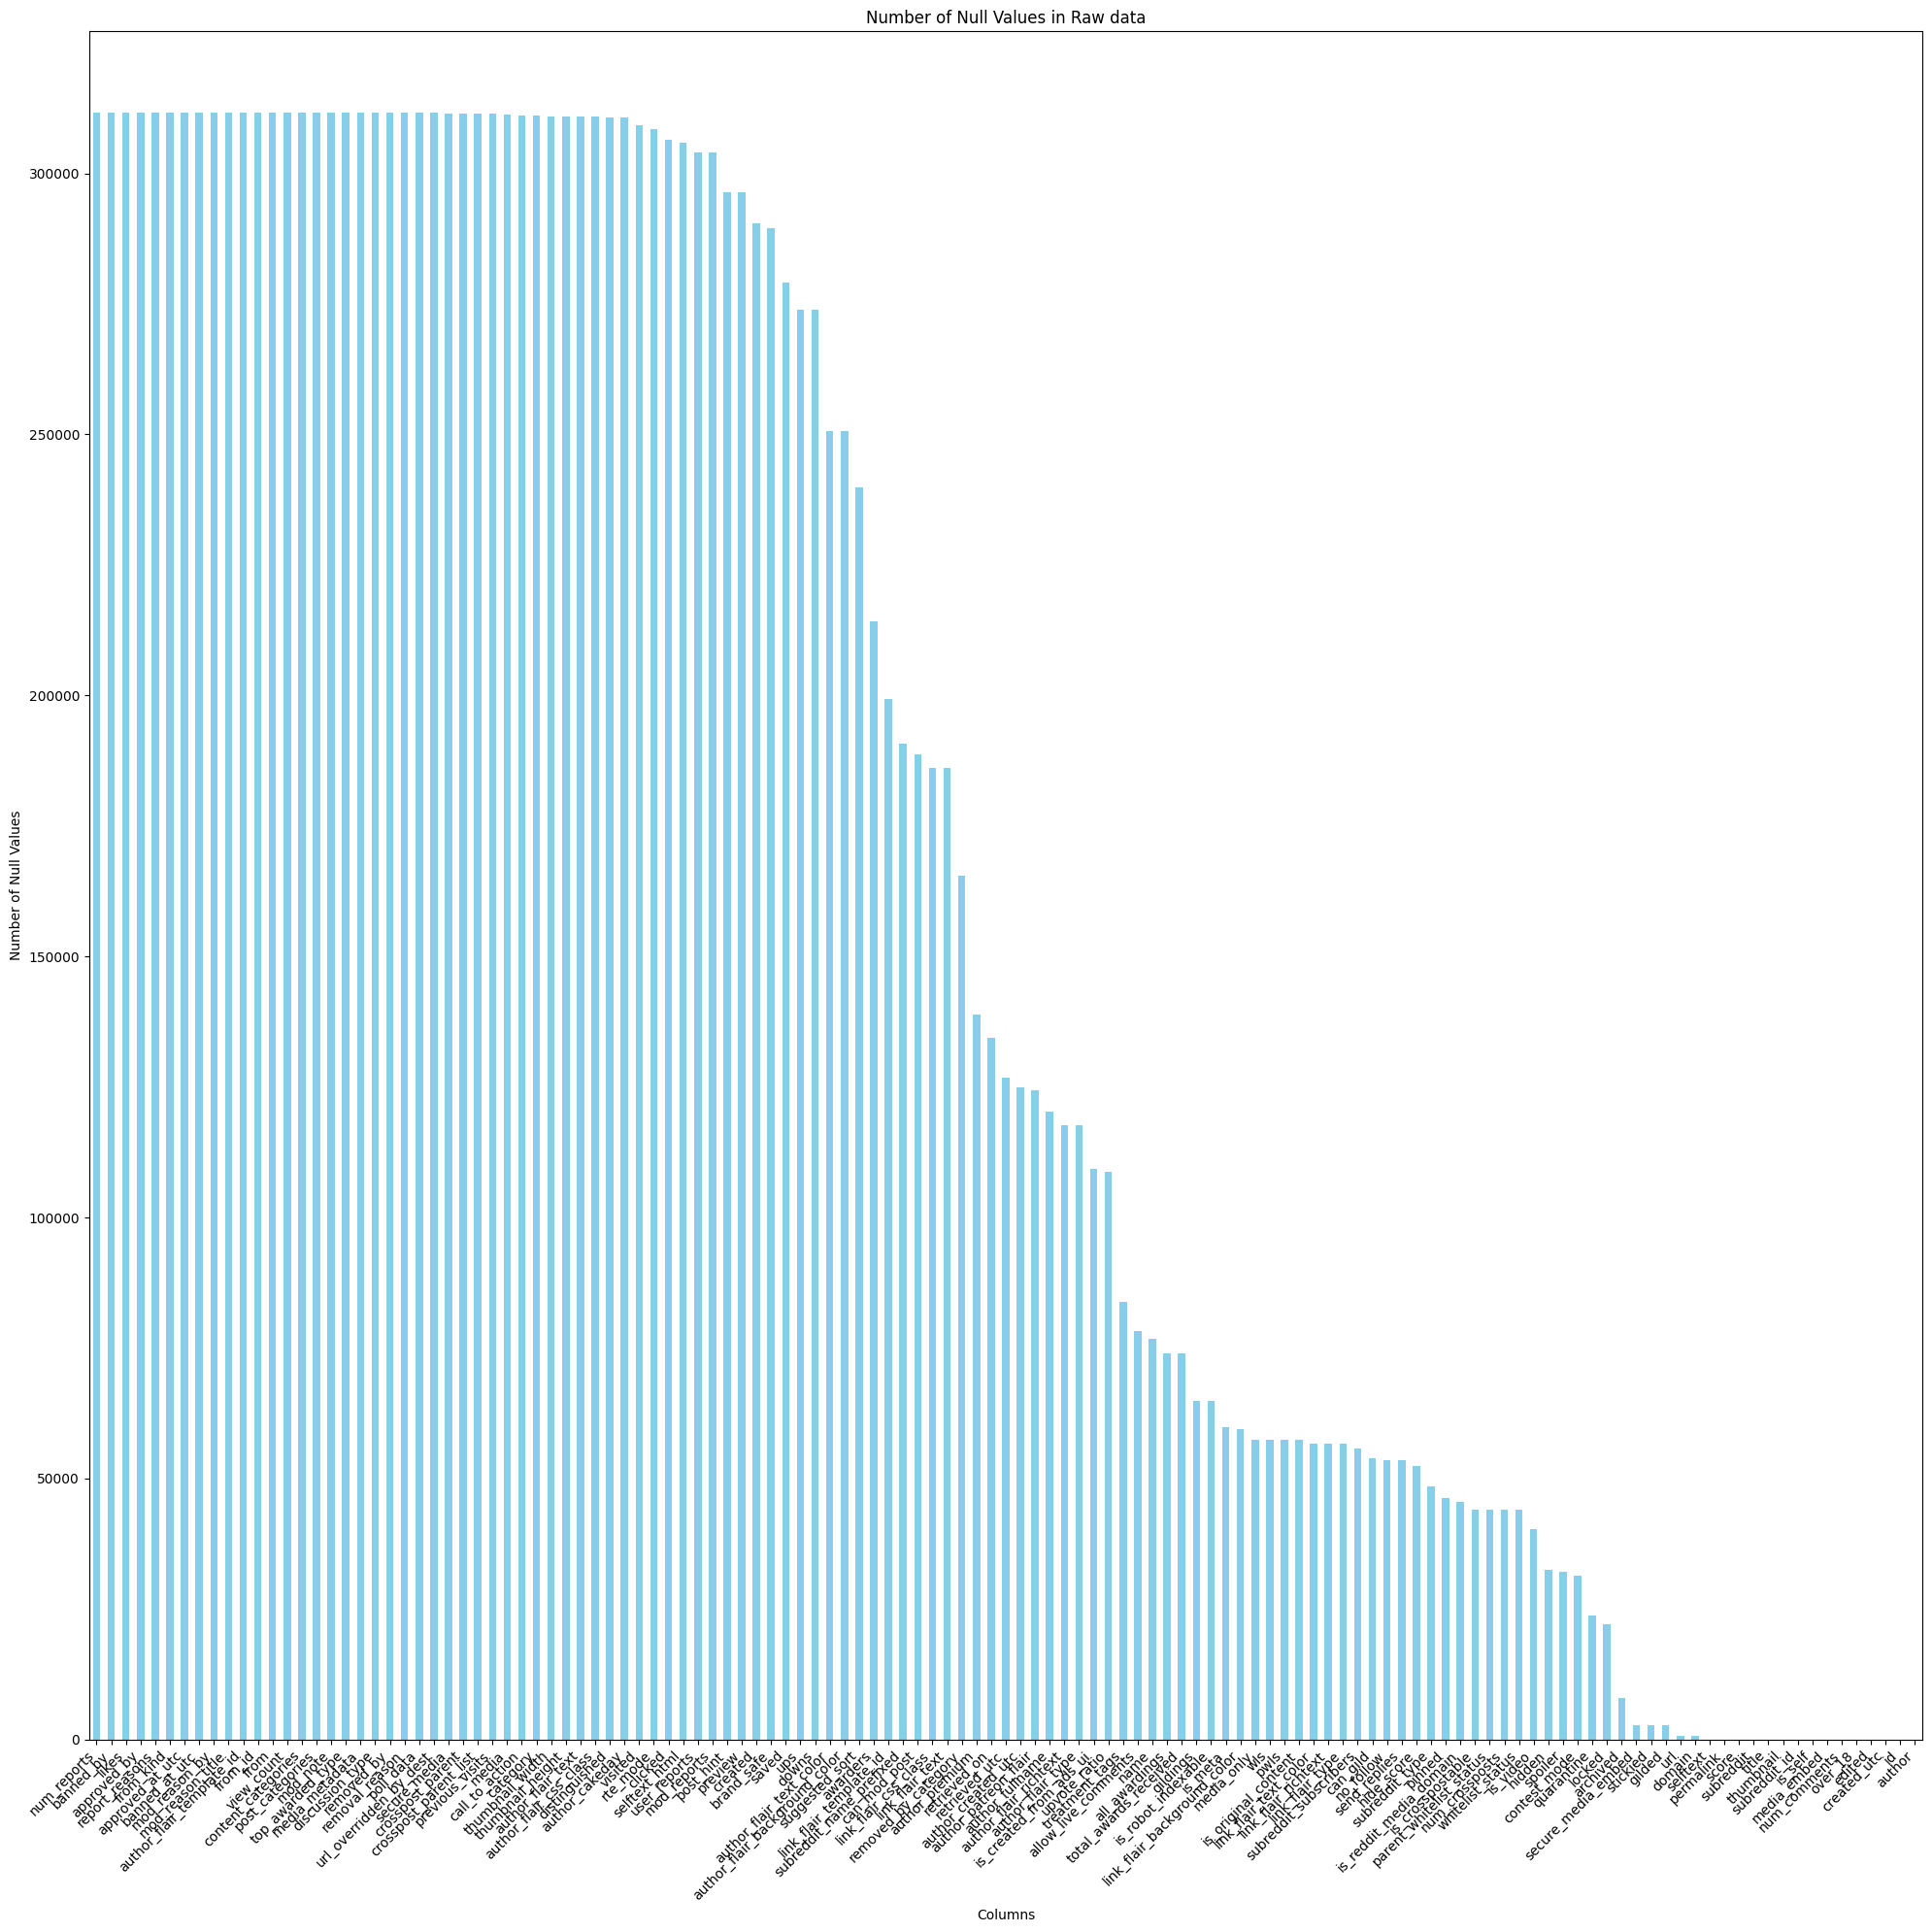

In [ ]:
plot_null_Values(stocks)

In [ ]:
columns_to_drop = list(stocks.columns[stocks.isna().sum() > len(stocks)/2])
columns_to_drop

['author_flair_background_color',
 'author_flair_css_class',
 'author_flair_text',
 'author_flair_text_color',
 'brand_safe',
 'distinguished',
 'link_flair_css_class',
 'link_flair_text',
 'media',
 'rte_mode',
 'secure_media',
 'subreddit_name_prefixed',
 'suggested_sort',
 'thumbnail_height',
 'thumbnail_width',
 'author_cakeday',
 'downs',
 'num_reports',
 'banned_by',
 'likes',
 'clicked',
 'saved',
 'ups',
 'approved_by',
 'selftext_html',
 'created',
 'mod_reports',
 'user_reports',
 'report_reasons',
 'from_kind',
 'from_id',
 'from',
 'post_hint',
 'preview',
 'view_count',
 'approved_at_utc',
 'banned_at_utc',
 'can_mod_post',
 'crosspost_parent',
 'crosspost_parent_list',
 'mod_note',
 'mod_reason_by',
 'mod_reason_title',
 'author_flair_template_id',
 'category',
 'content_categories',
 'post_categories',
 'removal_reason',
 'visited',
 'link_flair_template_id',
 'previous_visits',
 'discussion_type',
 'awarders',
 'removed_by',
 'removed_by_category',
 'top_awarded_type',


In [ ]:
stocks.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
stocks.columns

Index(['archived', 'author', 'author_flair_richtext', 'author_flair_type',
       'can_gild', 'contest_mode', 'created_utc', 'domain', 'edited', 'gilded',
       'hidden', 'hide_score', 'id', 'is_crosspostable',
       'is_reddit_media_domain', 'is_self', 'is_video', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_embed',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'retrieved_on', 'score',
       'secure_media_embed', 'selftext', 'send_replies', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_type', 'thumbnail', 'title',
       'url', 'whitelist_status', 'is_original_content', 'name', 'quarantine',
       'pinned', 'subreddit_subscribers', 'media_only', 'pwls', 'wls',
       'link_flair_background_color', 'author_created_utc', 'author_fullname',
       'is_meta', 'author_patreon_flair', 'gildings', 'is_robot_indexable',
       'all_awardings', 'total_awar

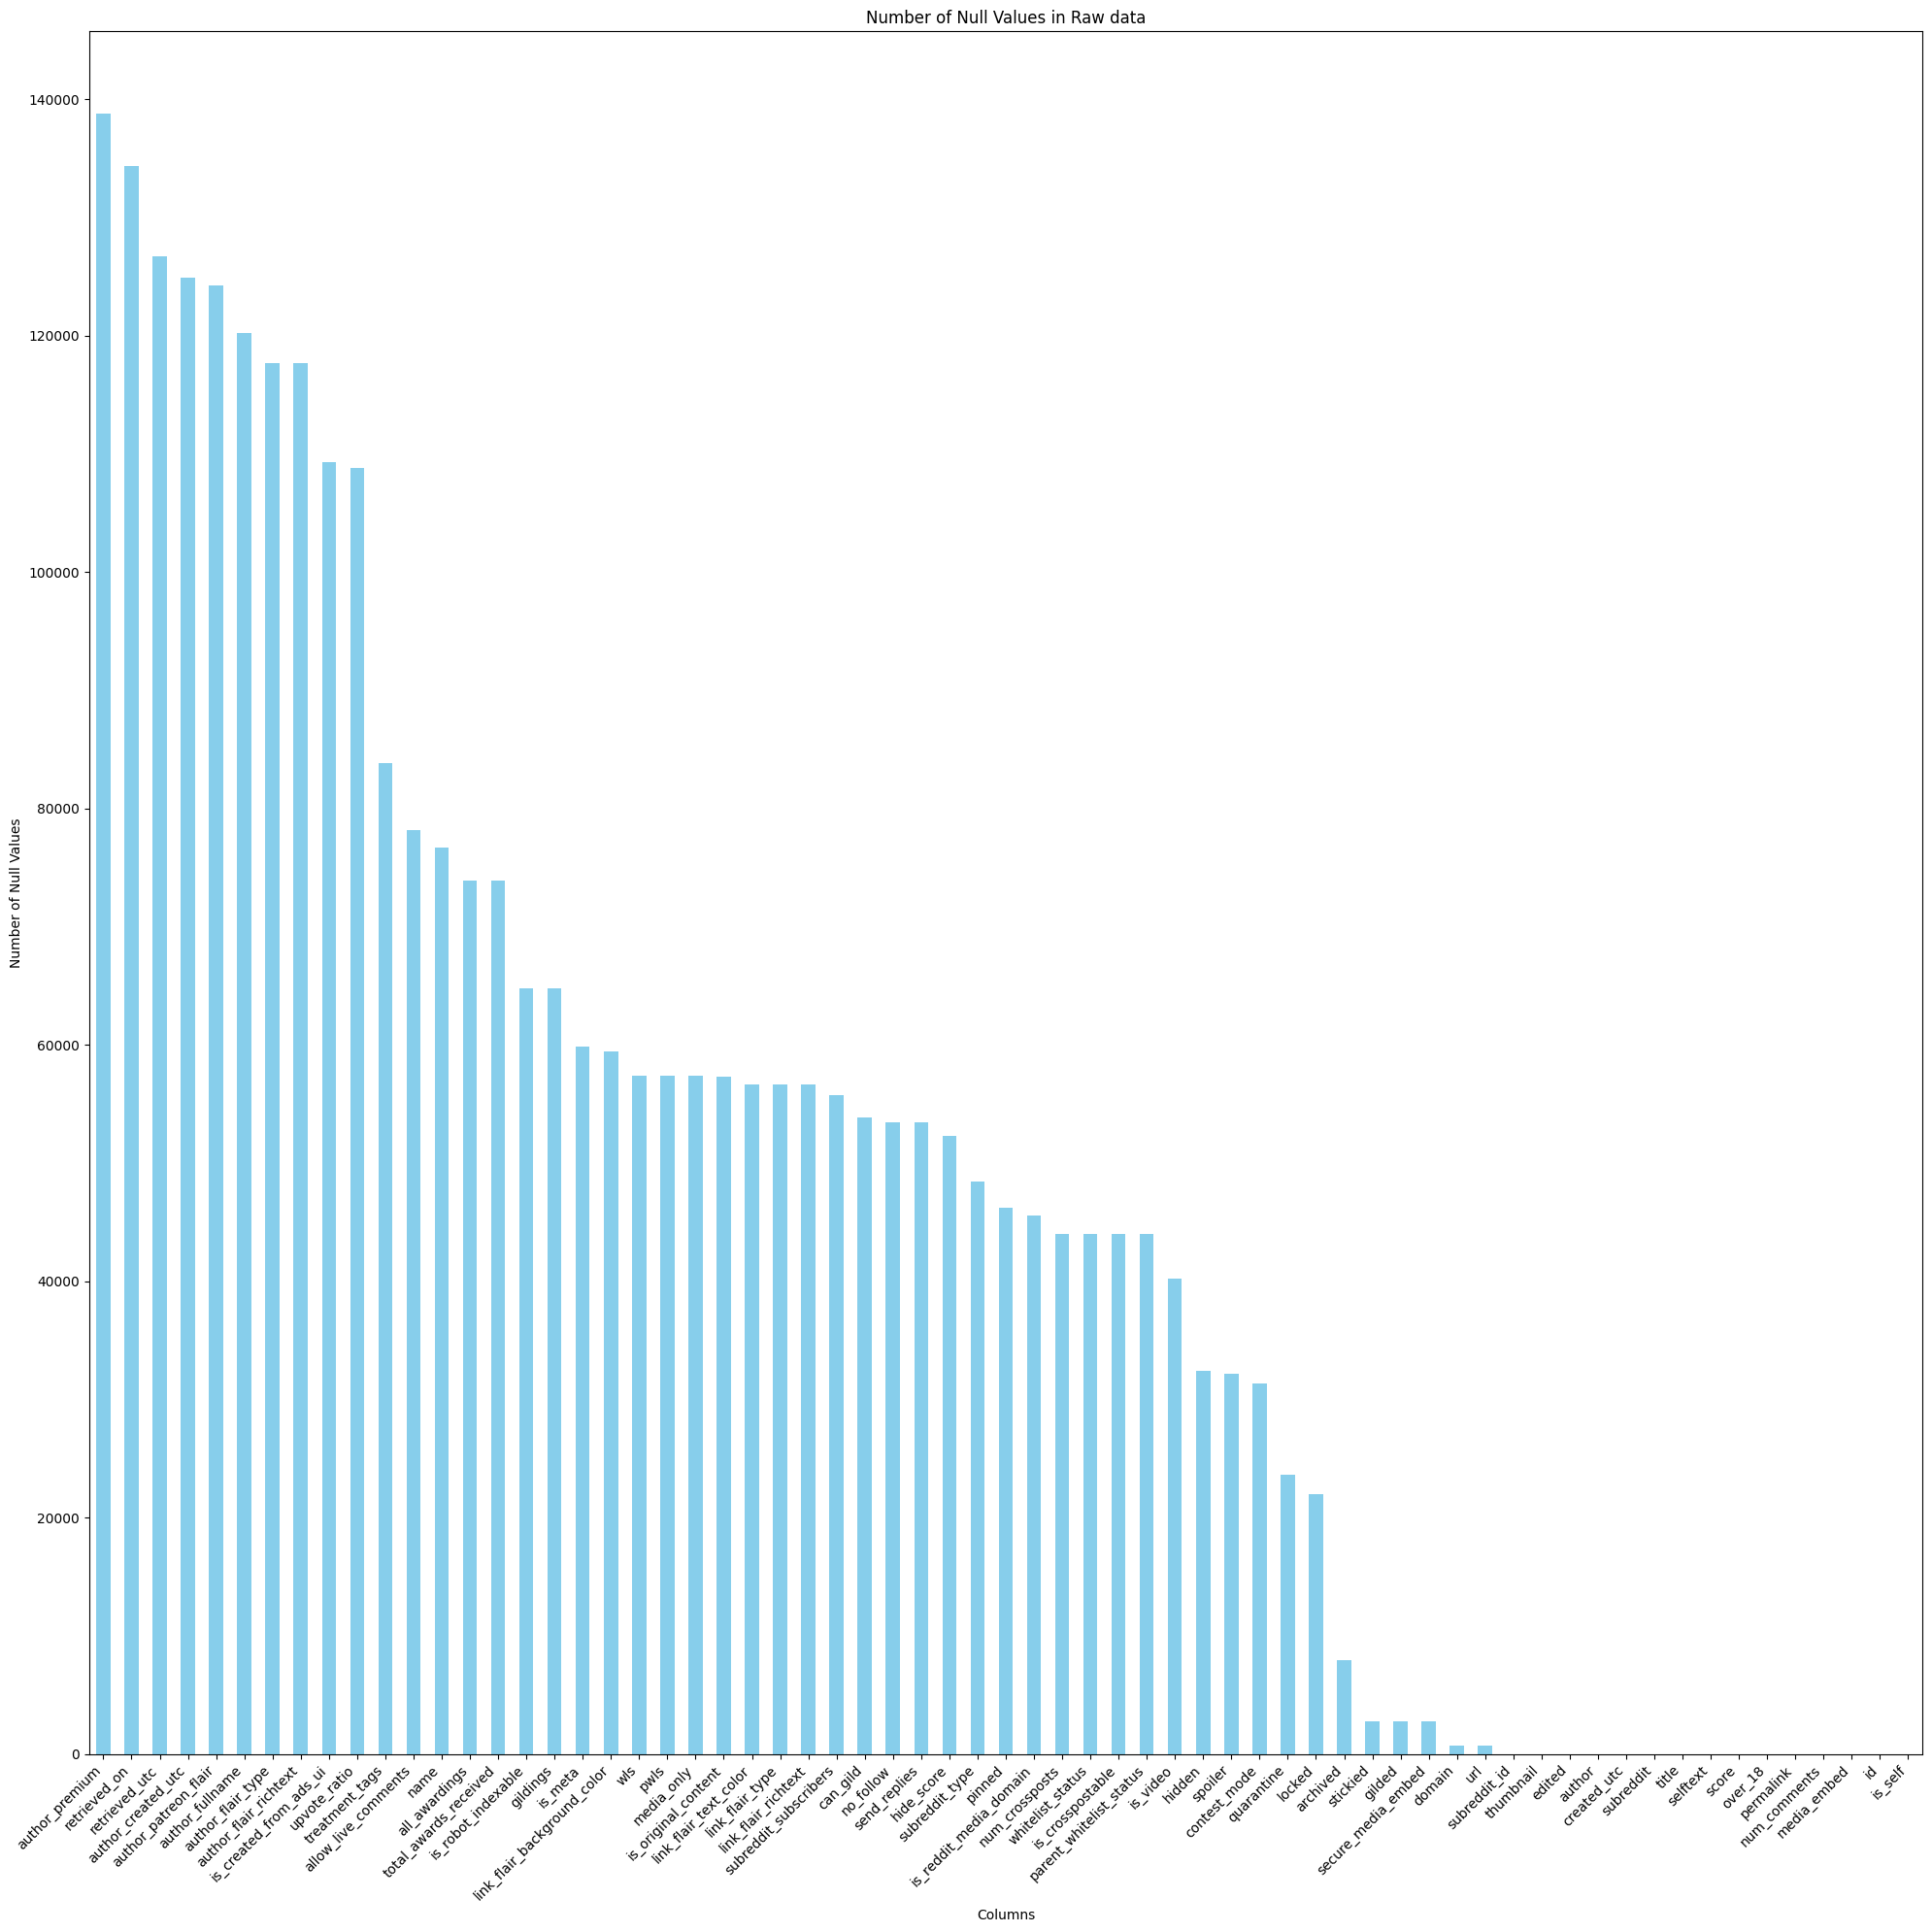

In [ ]:
plot_null_Values(stocks)

In [ ]:
stock_ticker = add_stock_ticker(stocks,'stocks')
stocks['stock_ticker'] = stock_ticker
stocks = stocks[stocks['stock_ticker'] != 'NaN']

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0


In [ ]:
stocks.shape

(19459, 66)

In [ ]:
# normalizing the
stocks['created_utc'] = pd.to_datetime(stocks['created_utc'], unit='s')
stocks['created_utc'] = stocks['created_utc'].dt.normalize()
stocks['created_utc'] = stocks['created_utc'].apply(lambda x: int(x.timestamp()))
stocks['created_utc']

72        1226275200
79        1227225600
96        1228867200
99        1229299200
107       1233187200
             ...    
311562    1672444800
311567    1672444800
311569    1672444800
311602    1672444800
311614    1672444800
Name: created_utc, Length: 19459, dtype: int64

In [ ]:
stocks.to_csv(f'/content/drive/Shareddrives/GWAR/cleaned_data.tsv', sep='\t',index=False, escapechar='\\')

In [ ]:
import pandas as pd

In [ ]:
stocks = pd.read_csv(f'/content/drive/Shareddrives/GWAR/cleaned_data.tsv', sep='\t')

In [ ]:
stocks.head()

,archived,author,author_flair_richtext,author_flair_type,can_gild,contest_mode,created_utc,domain,edited,gilded,...,is_robot_indexable,all_awardings,total_awards_received,allow_live_comments,author_premium,treatment_tags,upvote_ratio,is_created_from_ads_ui,retrieved_utc,stock_ticker
0,1.0,[deleted],NaN,NaN,0.0,0.0,1226275200,self.stocks,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMD
1,1.0,StockMarketFunding,[],text,1.0,0.0,1227225600,stockmarketfunding.com,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FSLR
2,1.0,StockMarketFunding,[],text,1.0,0.0,1228867200,stockmarketfunding.com,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CME
3,1.0,EconomyGuy,[],text,1.0,0.0,1229299200,stockmarketfunding.com,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FSLR
4,1.0,StockMarketFunding,[],text,1.0,0.0,1233187200,stockmarketfunding.com,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPM


In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19459 entries, 0 to 19458
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   archived                     18995 non-null  float64
 1   author                       19459 non-null  object 
 2   author_flair_richtext        13266 non-null  object 
 3   author_flair_type            13266 non-null  object 
 4   can_gild                     15330 non-null  float64
 5   contest_mode                 17318 non-null  float64
 6   created_utc                  19459 non-null  int64  
 7   domain                       19384 non-null  object 
 8   edited                       19459 non-null  int64  
 9   gilded                       19331 non-null  float64
 10  hidden                       17150 non-null  float64
 11  hide_score                   15276 non-null  float64
 12  id                           19459 non-null  object 
 13  is_crosspostable

In [ ]:
stocks.describe()

,archived,can_gild,contest_mode,created_utc,edited,gilded,hidden,hide_score,is_crosspostable,is_reddit_media_domain,...,author_created_utc,is_meta,author_patreon_flair,is_robot_indexable,total_awards_received,allow_live_comments,author_premium,upvote_ratio,is_created_from_ads_ui,retrieved_utc
count,18995.000000,15330.000000,17318.0,1.945900e+04,1.945900e+04,19331.000000,17150.0,15276.000000,16226.000000,16110.0,...,1.284100e+04,14811.0,12605.0,14333.000000,13492.000000,13123.000000,11184.000000,10664.000000,10601.0,9.727000e+03
mean,0.237484,0.881670,0.0,1.570471e+09,1.706295e+08,0.007242,0.0,0.000327,0.687477,0.0,...,1.520373e+09,0.0,0.0,0.750436,0.323599,0.290711,0.080293,0.796847,0.0,1.633051e+09
std,0.425552,0.323009,0.0,7.184663e+07,4.904333e+08,0.157086,0.0,0.018089,0.463536,0.0,...,8.929276e+07,0.0,0.0,0.432776,4.303210,0.454108,0.271759,0.199924,0.0,1.479570e+07
min,0.000000,0.000000,0.0,1.226275e+09,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,...,1.124251e+09,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.050000,0.0,1.622812e+09
25%,0.000000,1.000000,0.0,1.531872e+09,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,...,1.469313e+09,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.670000,0.0,1.622957e+09
50%,0.000000,1.000000,0.0,1.591920e+09,0.000000e+00,0.000000,0.0,0.000000,1.000000,0.0,...,1.542922e+09,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.840000,0.0,1.623375e+09
75%,0.000000,1.000000,0.0,1.616285e+09,0.000000e+00,0.000000,0.0,0.000000,1.000000,0.0,...,1.590333e+09,0.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.654037e+09
max,1.000000,1.000000,0.0,1.672445e+09,1.672513e+09,15.000000,0.0,1.000000,1.000000,0.0,...,1.671455e+09,0.0,0.0,1.000000,259.000000,1.000000,1.000000,1.000000,0.0,1.657169e+09


# merging all in a single file

In [ ]:
import pandas as pd

In [ ]:
ws = pd.read_csv('/content/drive/Shareddrives/GWAR/ws_stock_ticker.tsv', sep='\t')
ws

In [ ]:
tk = pd.read_csv('/content/drive/Shareddrives/GWAR/stock_trakstocks_whole.tsv', sep='\t')

In [ ]:
st = pd.read_csv('/content/drive/Shareddrives/GWAR/stock_investing.tsv', sep='\t')

In [ ]:
stmk = pd.read_csv('/content/drive/Shareddrives/GWAR/stmk.tsv', sep='\t')

In [ ]:
stocks = pd.read_csv('/content/drive/Shareddrives/GWAR/stocks.tsv', sep='\t')

In [ ]:
frames = [ws, tk, st, stmk, stocks]

In [ ]:
reddit = pd.concat(frames)

In [ ]:
reddit.to_csv(f'/content/drive/Shareddrives/GWAR/whole_reddit.tsv', sep='\t',index=False, escapechar='\\')

In [ ]:
import pandas as pd
reddit = pd.read_csv(f'/content/drive/Shareddrives/GWAR/whole_reddit.tsv', sep='\t')

In [ ]:
reddit

,created_utc,id,score,subreddit,subreddit_id,title,selftext,both,stock_ticker
0,1334162440,s4jw1,13.0,wallstreetbets,t5_2th52,Earnings season is here. Place your bets.,I know that /r/investing is a great place for ...,Earnings season is here. Place your bets.I kn...,LVS
1,1334263051,s6r57,2.0,wallstreetbets,t5_2th52,"GOOG - beat estimates, price barely rises.",NaN,"GOOG - beat estimates, price barely rises.nan",GOOG
2,1334615377,sd5ai,12.0,wallstreetbets,t5_2th52,My poorly timed opening position for AAPL earn...,"So I missed out on GOOG, which is probably a g...",My poorly timed opening position for AAPL earn...,AAPL
3,1334844620,shtex,7.0,wallstreetbets,t5_2th52,"EBAY posts higher 1Q net income and revenue, s...",NaN,"EBAY posts higher 1Q net income and revenue, s...",EBAY
4,1334969673,skmub,7.0,wallstreetbets,t5_2th52,AAPL Earnings bets?,"Today, when AAPL was heading for max pain at 5...","AAPL Earnings bets?Today, when AAPL was headin...",AAPL
...,...,...,...,...,...,...,...,...,...
105683,1672445775,zzg26m,1.0,stocks,t5_2qjfk,2023 Outlook: Your thoughts?,\n\n**The Strategy**\n\nMy strategy is based...,NaN,IP
105684,1672452157,zzidrt,10.0,stocks,t5_2qjfk,PEG vs forward PE,I’m struggling to understand why PEG is a good...,NaN,PEG
105685,1672454423,zzj6nf,4.0,stocks,t5_2qjfk,Wall Street Week Ahead for the trading week be...,Good Friday evening to all of you here on r/st...,NaN,TSLA
105686,1672513017,1000zqu,18.0,stocks,t5_2qjfk,What do you believe happens to ATVI stock if t...,[deleted],NaN,MSFT


In [ ]:
reddit.describe()

,created_utc,score
count,1.056880e+05,105688.000000
mean,1.569140e+09,89.165913
std,7.100217e+07,1140.574522
min,1.224267e+09,0.000000
25%,1.531788e+09,1.000000
50%,1.591715e+09,2.000000
75%,1.612826e+09,14.000000
max,1.672527e+09,102014.000000


In [ ]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105688 entries, 0 to 105687
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   created_utc   105688 non-null  int64  
 1   id            105688 non-null  object 
 2   score         105688 non-null  float64
 3   subreddit     105688 non-null  object 
 4   subreddit_id  105688 non-null  object 
 5   title         105688 non-null  object 
 6   selftext      87839 non-null   object 
 7   both          66666 non-null   object 
 8   stock_ticker  105688 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.3+ MB


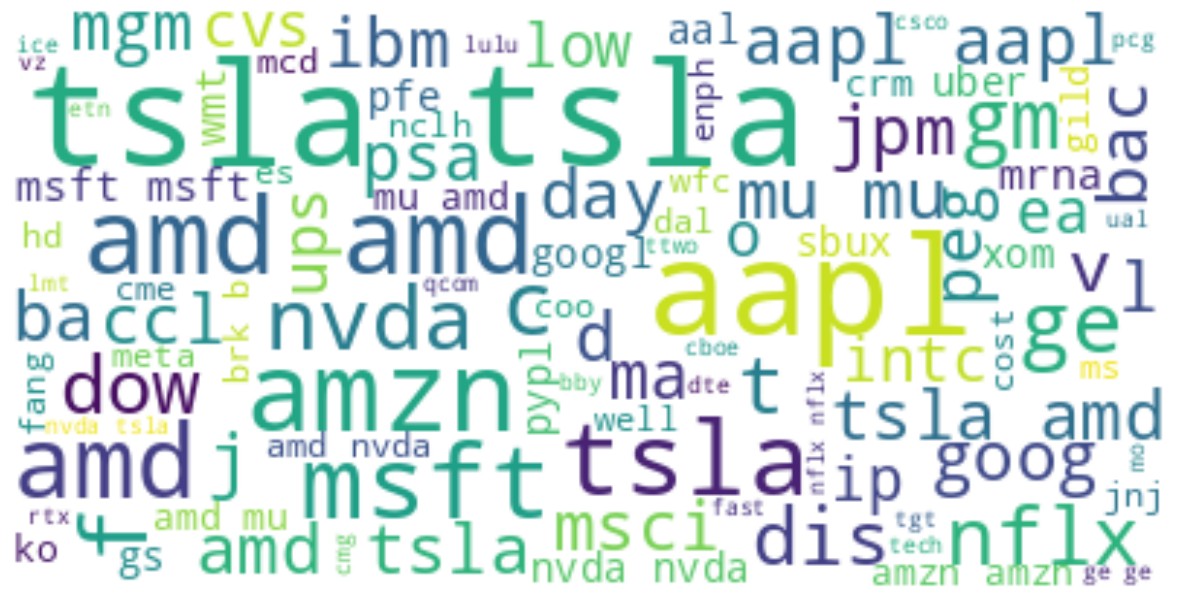

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = reddit['stock_ticker'].copy()
text = text.astype(str)
# Preprocess the text data
text = text.str.lower()
text = text.str.replace('[^\w\s]', '')
stopwords = set(STOPWORDS)
text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Create a WordCloud object
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(text))

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

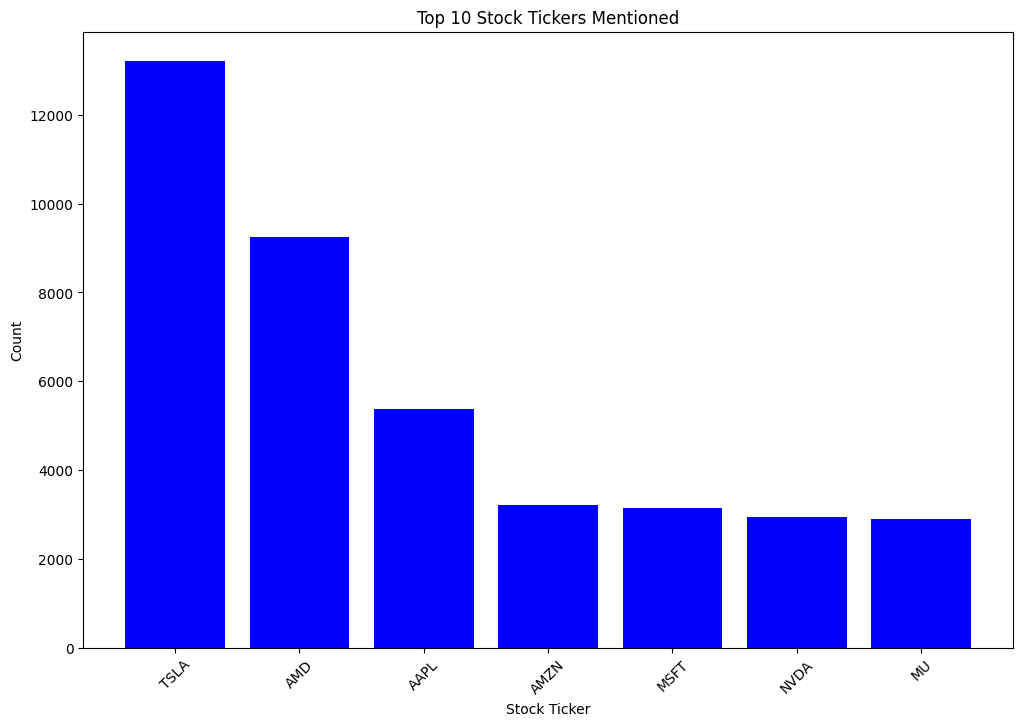

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it's already processed as previously mentioned
df = reddit.copy()
df['stock_ticker'].fillna('No Ticker', inplace=True)
ticker_counts = df.groupby('stock_ticker').size().reset_index(name='count')
ticker_counts_sorted = ticker_counts.sort_values(by='count', ascending=False)
ticker_counts_sorted = ticker_counts_sorted[ticker_counts_sorted['stock_ticker'] != 'No Ticker']
top_10_tickers = ticker_counts_sorted.head(7)
plt.figure(figsize=(12, 8))  # Set the figure size
plt.bar(top_10_tickers['stock_ticker'], top_10_tickers['count'], color='blue')  # Create a bar chart
plt.xlabel('Stock Ticker')  # Label on X-axis
plt.ylabel('Count')  # Label on Y-axis
plt.title('Top 10 Stock Tickers Mentioned')  # Title of the chart
plt.xticks(rotation=45)  # Rotate the X-axis labels for better readability
plt.show()  # Display the plot


# correlation matrix

In [ ]:
import pandas as pd
# your_filename = folder_path + "//content/pennystocks_submissions.zst.zst"
df = pd.read_json("/content/drive/Shareddrives/GWAR/investing_submissions.zst",compression='zstd',lines=True)

ValueError: Expected object or value

In [ ]:
stock_ticker = add_stock_ticker(df,'trakstocks')
df['stock_ticker'] = stock_ticker

In [ ]:
df = df[df['stock_ticker'] != 'NaN']

In [ ]:
df.replace('NaN', None, inplace=True)

NameError: name 'df' is not defined

In [ ]:
df.isna().sum()

archived                   2185
author                        0
contest_mode               4971
created_utc                   0
domain                        0
edited                        0
gilded                      721
hidden                     4611
hide_score                 4687
id                            0
is_crosspostable           6042
is_reddit_media_domain     6131
is_self                       0
is_video                   5755
locked                     3888
media_embed                   0
no_follow                  6597
num_comments                  0
num_crossposts             6042
over_18                       0
parent_whitelist_status    6042
permalink                     0
retrieved_on               3173
score                         0
secure_media_embed          721
selftext                      0
send_replies               6597
spoiler                    5054
stickied                    721
subreddit                     0
subreddit_id                  0
subreddi

In [ ]:
columns_to_drop = list(df.columns[df.isna().sum() > len(df) / 2])

In [ ]:
df.drop(columns_to_drop, axis=1, inplace=True)

<ipython-input-31-acb402972b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
df.to_csv('/content/drive/Shareddrives/GWAR/inv_col_dropped.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13262 entries, 85 to 324775
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   archived                 11077 non-null  float64
 1   author                   13262 non-null  object 
 2   contest_mode             8291 non-null   float64
 3   created_utc              13262 non-null  int64  
 4   domain                   13262 non-null  object 
 5   edited                   13262 non-null  int64  
 6   gilded                   12541 non-null  float64
 7   hidden                   8651 non-null   float64
 8   hide_score               8575 non-null   float64
 9   id                       13262 non-null  object 
 10  is_crosspostable         7220 non-null   float64
 11  is_reddit_media_domain   7131 non-null   float64
 12  is_self                  13262 non-null  bool   
 13  is_video                 7507 non-null   float64
 14  locked                   

In [ ]:
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number])

In [ ]:
numeric_columns

,archived,contest_mode,created_utc,edited,gilded,hidden,hide_score,is_crosspostable,is_reddit_media_domain,is_video,...,no_follow,num_comments,num_crossposts,retrieved_on,score,send_replies,spoiler,stickied,quarantine,pinned
85,1.0,0.0,1224267235,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0.0,1.522759e+09,4,1.0,0.0,0.0,NaN,NaN
99,1.0,0.0,1224623376,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,0.0,1.522760e+09,4,1.0,0.0,0.0,NaN,NaN
102,1.0,0.0,1224708802,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0.0,1.522760e+09,1,1.0,0.0,0.0,NaN,NaN
105,1.0,0.0,1224784705,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0.0,1.522760e+09,0,1.0,0.0,0.0,NaN,NaN
106,1.0,0.0,1224785349,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0.0,1.522760e+09,1,1.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324602,0.0,0.0,1672334927,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,14,0.0,1.673170e+09,13,1.0,0.0,0.0,0.0,0.0
324703,0.0,0.0,1672432719,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,7,0.0,1.673169e+09,0,1.0,0.0,0.0,0.0,0.0
324717,0.0,0.0,1672450123,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,12,0.0,1.673169e+09,4,1.0,0.0,0.0,0.0,0.0
324760,0.0,0.0,1672502209,0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,52,0.0,1.673168e+09,482,1.0,0.0,0.0,0.0,0.0


# correlation matrix for Investing_submissions.zst file

In [ ]:
import pandas as pd
#reddit = pd.read_csv(f'/content/drive/Shareddrives/GWAR/whole_reddit.tsv', sep='\t')
df = pd.read_json("/content/drive/Shareddrives/GWAR/investing_submissions.zst",compression='zstd',lines=True)

In [ ]:
df

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,...,treatment_tags,upvote_ratio,is_created_from_ads_ui,retrieved_utc,top_awarded_type,event_end,event_is_live,event_start,url_overridden_by_dest,call_to_action
0,1.0,yuckatan,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Escafane,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Escafane,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Escafane,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,Escafane,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324779,0.0,[deleted],,None,NaN,None,dark,NaN,NaN,0.0,...,[],1.00,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN
324780,0.0,kuriousaboutanything,None,None,[],None,None,text,NaN,1.0,...,[],1.00,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN
324781,0.0,Marketing-Flare,None,None,[],None,None,text,NaN,1.0,...,[],1.00,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN
324782,0.0,[deleted],,None,NaN,None,dark,NaN,NaN,0.0,...,[],1.00,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324784 entries, 0 to 324783
Columns: 127 entries, archived to call_to_action
dtypes: bool(2), float64(67), int64(4), object(54)
memory usage: 310.4+ MB


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])


In [ ]:
# drop None and NaN values
df_numeric = df_numeric.dropna(axis=1)

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324784 entries, 0 to 324783
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   created_utc   324784 non-null  int64
 1   edited        324784 non-null  int64
 2   num_comments  324784 non-null  int64
 3   score         324784 non-null  int64
dtypes: int64(4)
memory usage: 9.9 MB


In [ ]:
df_numeric

,created_utc,edited,num_comments,score
0,1205583687,0,1,2
1,1205929080,0,0,1
2,1205929704,0,0,1
3,1205930985,0,0,2
4,1205931725,0,0,1
...,...,...,...,...
324779,1672525678,0,1,1
324780,1672525837,0,1,1
324781,1672526817,0,0,1
324782,1672530232,0,1,1


In [ ]:
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

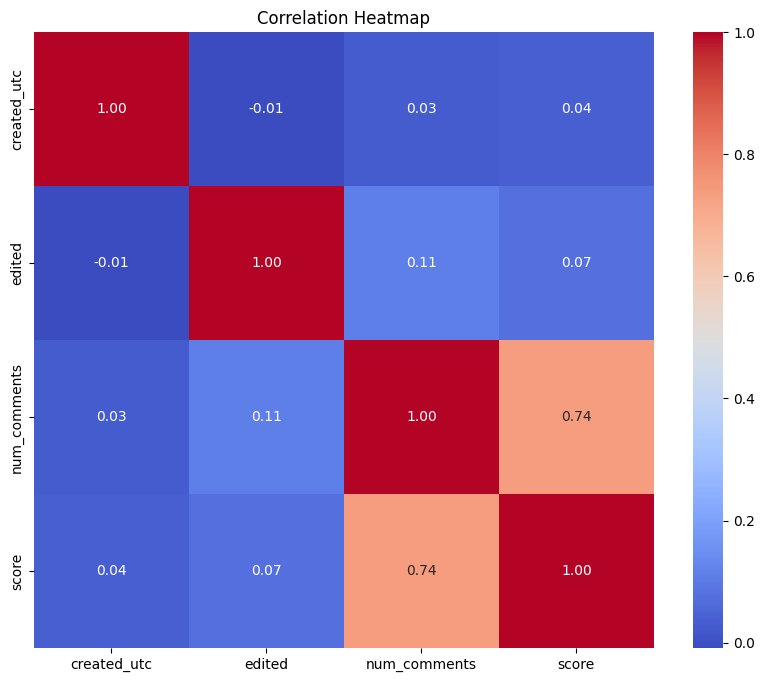

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()